First, we load the needed packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.style.use("ggplot")

pd.set_option('display.max_columns', None)

Next, we load the cleaned data:

In [2]:
path="../../data/Rockwell_Flow_Loop_Data/final_columns.csv"
data=pd.read_csv(path)
data.head(5)

,Unnamed: 0,max_FIT102_Raw_Signal,min_FIT102_Raw_Signal,mean_FIT102_Raw_Signal,std_FIT102_Raw_Signal,max_FIT202_Raw_Signal,min_FIT202_Raw_Signal,mean_FIT202_Raw_Signal,std_FIT202_Raw_Signal,max_LIT101_Raw_Signal,min_LIT101_Raw_Signal,mean_LIT101_Raw_Signal,std_LIT101_Raw_Signal,max_LIT201_Raw_Signal,min_LIT201_Raw_Signal,mean_LIT201_Raw_Signal,std_LIT201_Raw_Signal,max_PIT101_Raw_Signal,min_PIT101_Raw_Signal,mean_PIT101_Raw_Signal,std_PIT101_Raw_Signal,max_PIT102_Raw_Signal,min_PIT102_Raw_Signal,mean_PIT102_Raw_Signal,std_PIT102_Raw_Signal,max_PIT201_Raw_Signal,min_PIT201_Raw_Signal,mean_PIT201_Raw_Signal,std_PIT201_Raw_Signal,max_PIT202_Raw_Signal,min_PIT202_Raw_Signal,mean_PIT202_Raw_Signal,std_PIT202_Raw_Signal,max_SI102_Raw_Signal,min_SI102_Raw_Signal,mean_SI102_Raw_Signal,std_SI102_Raw_Signal,max_SI202_Raw_Signal,min_SI202_Raw_Signal,mean_SI202_Raw_Signal,std_SI202_Raw_Signal,event,binary,ternary
0,2022-07-13 09:13:09,4.30,-4.28,-0.248235,2.485488,2.68,-4.32,-0.040000,1.948820,2.50,-2.28,-0.052941,1.501149,0.32,-0.32,-0.032941,0.235366,0.10,-0.18,0.002353,0.077098,1.04,-1.00,-2.612289e-17,0.648151,0.36,-0.80,-0.020000,0.320624,0.44,-0.46,0.008235,0.281164,4.60,-5.52,0.112941,3.532336,3.36,-3.78,0.144706,2.021256,normal,normal,normal
1,2022-07-13 09:13:39,4.58,-3.32,0.001176,2.543123,2.26,-5.88,-0.301176,2.072203,2.56,-2.54,-0.140000,1.460856,0.38,-0.32,0.014118,0.248572,0.18,-0.18,0.002353,0.093777,0.76,-1.00,-1.764706e-02,0.500843,0.32,-0.52,-0.001176,0.270414,0.60,-0.68,0.010588,0.337870,4.60,-5.52,-0.005882,2.935633,5.50,-4.86,0.216471,2.585239,normal,normal,normal
2,2022-07-13 09:14:09,5.10,-3.80,0.071765,2.814365,5.16,-5.88,-0.015294,2.419654,2.56,-2.54,-0.109412,1.563699,0.38,-0.32,0.038824,0.231460,0.18,-0.16,-0.007059,0.072091,0.76,-1.18,-2.941176e-02,0.583186,0.30,-0.40,0.004706,0.209944,0.60,-0.68,-0.031765,0.301169,4.52,-7.34,-0.094118,3.015840,5.50,-4.86,0.003529,2.354902,normal,normal,normal
3,2022-07-13 09:14:39,5.10,-3.80,-0.042353,2.228765,5.16,-5.88,0.134118,2.475508,1.86,-2.54,-0.074118,1.471713,0.38,-0.50,0.008235,0.209411,0.18,-0.16,-0.001176,0.086450,0.68,-1.18,1.176471e-02,0.474608,0.30,-0.40,-0.005882,0.227130,0.60,-0.68,-0.003529,0.346355,3.32,-7.34,0.070588,2.370318,5.50,-4.86,0.007059,2.695959,normal,normal,normal
4,2022-07-13 09:15:09,5.10,-3.80,0.175294,2.095346,2.74,-3.54,-0.143529,1.719989,1.86,-1.64,-0.080000,1.341343,0.34,-0.50,0.012941,0.201115,0.20,-0.12,0.007059,0.084244,3.44,-1.18,2.141176e-01,0.952070,0.60,-0.46,-0.008235,0.258849,0.58,-0.90,0.010588,0.390904,2.88,-7.34,-0.021176,2.296775,4.10,-4.10,-0.045882,2.096411,normal,normal,normal


The ternary data column contains whether the data is normal, or whether there are mechanical or cyberattacks.

In [3]:
data.ternary.value_counts()

normal        10347
mechanical     2557
cyber           290
Name: ternary, dtype: int64

We now preprocess the data. We need to encode the labels of the target variable, and define the features as well as the targets. We also split the test and train set randomly here, and scale the features.

In [4]:
#ordinal encode labels
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
labelencoder.fit(data.ternary)
data["EncodedErrors"]=labelencoder.transform(data.ternary)

In [5]:
features=data
features=features.drop(["event","binary","ternary","Unnamed: 0","EncodedErrors"],axis=1)
y=data["EncodedErrors"]

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.20, random_state = 100,stratify=y)

In [7]:
X_train=X_train.copy()
X_test=X_test.copy()
y_train=y_train.copy()
y_test=y_test.copy()

In [8]:
from sklearn.preprocessing import StandardScaler
attributes=["max_FIT102_Raw_Signal","min_FIT102_Raw_Signal","mean_FIT102_Raw_Signal","std_FIT102_Raw_Signal","max_FIT202_Raw_Signal","min_FIT202_Raw_Signal","mean_FIT202_Raw_Signal","std_FIT202_Raw_Signal","max_LIT101_Raw_Signal","min_LIT101_Raw_Signal","mean_LIT101_Raw_Signal","std_LIT101_Raw_Signal","max_LIT201_Raw_Signal","min_LIT201_Raw_Signal","mean_LIT201_Raw_Signal","std_LIT201_Raw_Signal","max_PIT101_Raw_Signal","min_PIT101_Raw_Signal","mean_PIT101_Raw_Signal","std_PIT101_Raw_Signal","max_PIT102_Raw_Signal","min_PIT102_Raw_Signal","mean_PIT102_Raw_Signal","std_PIT102_Raw_Signal","max_PIT201_Raw_Signal","min_PIT201_Raw_Signal","mean_PIT201_Raw_Signal","std_PIT201_Raw_Signal","max_PIT202_Raw_Signal","min_PIT202_Raw_Signal","mean_PIT202_Raw_Signal","std_PIT202_Raw_Signal","max_SI102_Raw_Signal","min_SI102_Raw_Signal","mean_SI102_Raw_Signal","std_SI102_Raw_Signal","max_SI202_Raw_Signal","min_SI202_Raw_Signal","mean_SI202_Raw_Signal","std_SI202_Raw_Signal"]
scaler=StandardScaler()
scaler.fit(X_train[attributes])
X_train[attributes]=scaler.transform(X_train[attributes])
X_test[attributes]=scaler.transform(X_test[attributes])

In [9]:
unique, counts = np.unique(y_test, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0   58]
 [   1  511]
 [   2 2070]]


Next, we run the XGBoost classifer.

In [10]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb=XGBClassifier(objective="multi:softmax",use_label_encoder=False)
parameters={"n_estimators":[100], "learning_rate":[0.1], "max_depth":[6], "gamma":[0.1]}

xgb_cv=GridSearchCV(xgb, parameters, scoring="accuracy",cv=2)
xgb_cv.fit(X_train,y_train)

print("Best parameters:", xgb_cv.best_params_ , ", Best CV Accuracy:", xgb_cv.best_score_)

Best parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100} , Best CV Accuracy: 0.95196572196631


In [11]:
#prediction
from sklearn.metrics import accuracy_score
y_hat=xgb_cv.best_estimator_.predict(X_test)
print("XGBC has test accuracy", round(100*(accuracy_score(y_hat,y_test)),2), "%")

XGBC has test accuracy 96.13 %


In [12]:
y_baseline=np.zeros(len(y_test))
from sklearn.metrics import f1_score
print("F1 score of baseline is", f1_score(y_test,y_baseline,average="macro"))
print("F1 score of XGB is", f1_score(y_test,y_hat,average="macro"))

F1 score of baseline is 0.014336917562724016
F1 score of XGB is 0.9086007067913643


In [13]:
#print classification report
from sklearn.metrics import classification_report, plot_confusion_matrix
print('Classification report')
print(classification_report(y_test, y_hat))
print('\n')

Classification report
              precision    recall  f1-score   support

           0       0.92      0.78      0.84        58
           1       0.94      0.87      0.91       511
           2       0.97      0.99      0.98      2070

    accuracy                           0.96      2639
   macro avg       0.94      0.88      0.91      2639
weighted avg       0.96      0.96      0.96      2639





In [14]:
y_test.value_counts()

2    2070
1     511
0      58
Name: EncodedErrors, dtype: int64

In [15]:
y_hat_df=pd.Series(y_hat)
y_hat_df.value_counts()

2    2116
1     474
0      49
dtype: int64

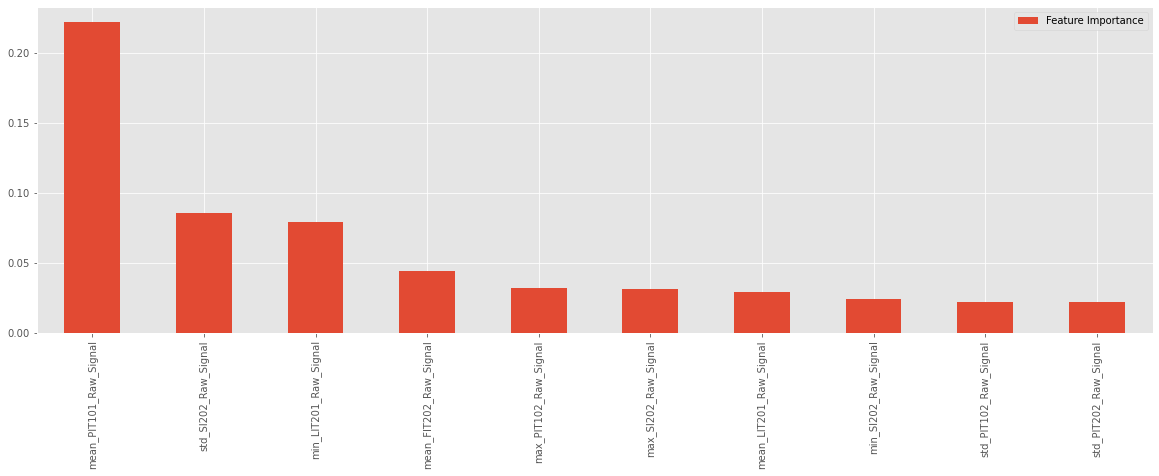

In [16]:
#plot feature importance of xgb
importance_df=pd.DataFrame(xgb_cv.best_estimator_.feature_importances_, 
                           index=X_train.columns, columns=["Feature Importance"])

importance_df.sort_values(by="Feature Importance", ascending=False).head(10).plot(kind="bar",figsize=(20,6));

In [17]:
#Multiclass classification
#ordinal encode labels
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
labelencoder.fit(data.event)
data["EncodedErrors2"]=labelencoder.transform(data.event)

In [18]:
features=data
features=features.drop(["event","binary","ternary","Unnamed: 0","EncodedErrors","EncodedErrors2"],axis=1)
y=data["EncodedErrors2"]

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train2,X_test2, y_train2, y_test2 = train_test_split(features, y, test_size = 0.20, random_state = 100,stratify=y)

In [20]:
X_train2=X_train2.copy()
X_test2=X_test2.copy()
y_train2=y_train2.copy()
y_test2=y_test2.copy()

In [21]:
from sklearn.preprocessing import StandardScaler
attributes=["max_FIT102_Raw_Signal","min_FIT102_Raw_Signal","mean_FIT102_Raw_Signal","std_FIT102_Raw_Signal","max_FIT202_Raw_Signal","min_FIT202_Raw_Signal","mean_FIT202_Raw_Signal","std_FIT202_Raw_Signal","max_LIT101_Raw_Signal","min_LIT101_Raw_Signal","mean_LIT101_Raw_Signal","std_LIT101_Raw_Signal","max_LIT201_Raw_Signal","min_LIT201_Raw_Signal","mean_LIT201_Raw_Signal","std_LIT201_Raw_Signal","max_PIT101_Raw_Signal","min_PIT101_Raw_Signal","mean_PIT101_Raw_Signal","std_PIT101_Raw_Signal","max_PIT102_Raw_Signal","min_PIT102_Raw_Signal","mean_PIT102_Raw_Signal","std_PIT102_Raw_Signal","max_PIT201_Raw_Signal","min_PIT201_Raw_Signal","mean_PIT201_Raw_Signal","std_PIT201_Raw_Signal","max_PIT202_Raw_Signal","min_PIT202_Raw_Signal","mean_PIT202_Raw_Signal","std_PIT202_Raw_Signal","max_SI102_Raw_Signal","min_SI102_Raw_Signal","mean_SI102_Raw_Signal","std_SI102_Raw_Signal","max_SI202_Raw_Signal","min_SI202_Raw_Signal","mean_SI202_Raw_Signal","std_SI202_Raw_Signal"]
scaler=StandardScaler()
scaler.fit(X_train2[attributes])
X_train2[attributes]=scaler.transform(X_train2[attributes])
X_test2[attributes]=scaler.transform(X_test2[attributes])

In [22]:
unique, counts = np.unique(y_test, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0   58]
 [   1  511]
 [   2 2070]]


Similarly, we can perform a multiclass classification where we classify all the different anomaly types.

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb2=XGBClassifier(objective="multi:softmax",use_label_encoder=False)
parameters={"n_estimators":[100], "learning_rate":[0.1], "max_depth":[6], "gamma":[0.1]}

xgb_cv2=GridSearchCV(xgb2, parameters, scoring="accuracy",cv=2)
xgb_cv2.fit(X_train2,y_train2)

print("Best parameters:", xgb_cv2.best_params_ , ", Best CV Accuracy:", xgb_cv2.best_score_)

Best parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100} , Best CV Accuracy: 0.9556607879518624


In [24]:
#prediction
from sklearn.metrics import accuracy_score
y_hat2=xgb_cv2.best_estimator_.predict(X_test2)
print("XGBC has test accuracy", round(100*(accuracy_score(y_hat2,y_test2)),2), "%")

XGBC has test accuracy 97.39 %


In [25]:
y_baseline=np.zeros(len(y_test))
from sklearn.metrics import f1_score
print("F1 score of baseline is", f1_score(y_test2,y_baseline,average="macro"))
print("F1 score of XGB is", f1_score(y_test2,y_hat2,average="macro"))

F1 score of baseline is 0.004046404511310561
F1 score of XGB is 0.9108750813611333


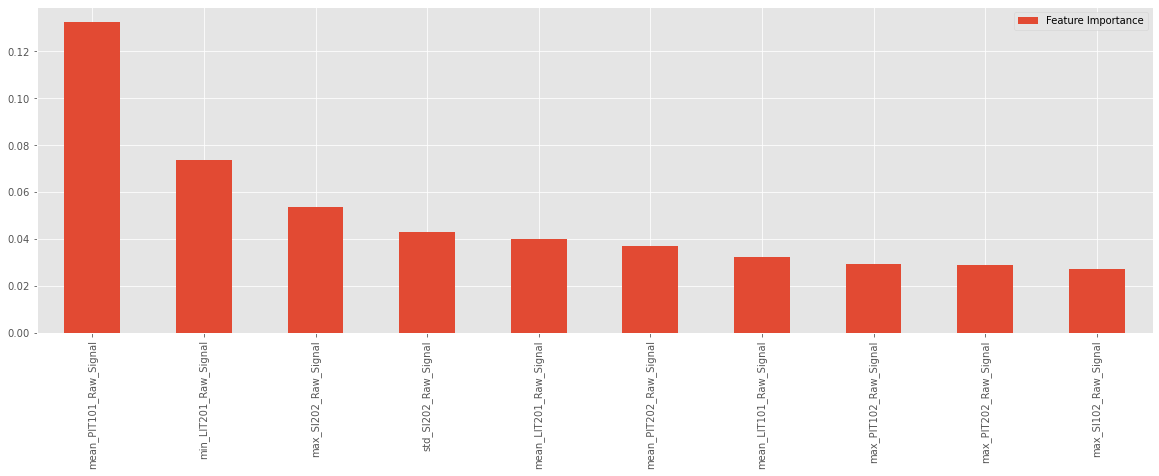

In [26]:
#plot feature importance of xgb
importance_df=pd.DataFrame(xgb_cv2.best_estimator_.feature_importances_, 
                           index=X_train2.columns, columns=["Feature Importance"])

importance_df.sort_values(by="Feature Importance", ascending=False).head(10).plot(kind="bar",figsize=(20,6));

In [29]:
#print classification report
from sklearn.metrics import classification_report, plot_confusion_matrix
print('Classification report')
print(classification_report(y_test2, y_hat2,target_names=labels))
print('\n')

Classification report
                        precision    recall  f1-score   support

                HV_101       0.98      0.96      0.97        94
                HV_201       0.98      1.00      0.99        63
               LCV_103       0.95      0.89      0.92        45
               LCV_202       1.00      1.00      1.00         1
               LCV_203       1.00      0.91      0.95        43
                 Pumps       1.00      0.33      0.50         3
                SV_101       0.97      0.90      0.93       127
           SV_101_half       1.00      1.00      1.00         2
              SV_102_A       1.00      0.75      0.86         4
              SV_102_B       1.00      1.00      1.00         1
                SV_201       0.98      0.79      0.88        68
              SV_202_B       1.00      1.00      1.00         6
                   dos       0.94      0.94      0.94        52
             injection       1.00      0.83      0.91         6
                n

In [30]:
data.event.value_counts()

normal                    10347
SV_101                      632
HV_101                      468
SV_201                      340
HV_201                      317
dos                         261
LCV_103                     226
LCV_203                     216
overall_instrument_air      156
power                       115
SV_202_B                     29
injection                    29
SV_102_A                     18
Pumps                        15
SV_101_half                  12
LCV_202                       7
SV_102_B                      6
Name: event, dtype: int64

In [31]:
data.EncodedErrors2.value_counts()

14    10347
6       632
0       468
10      340
1       317
12      261
2       226
4       216
15      156
16      115
11       29
13       29
8        18
5        15
7        12
3         7
9         6
Name: EncodedErrors2, dtype: int64

In [28]:
labels=["HV_101","HV_201","LCV_103","LCV_202","LCV_203","Pumps","SV_101","SV_101_half","SV_102_A","SV_102_B","SV_201","SV_202_B","dos","injection","normal","overall_instrument_air","power"]

Next, we fit the new data to see how the algorithm performs in this case. The data has changed in a couple of different ways: 1.) We now do not randomly split the training and test set anymore, as this can lead to data leakage, in particular for the cyberattacks. 2.) We observe that there are often large periods of data missing for cyberattacks. Therefore, we define a new feature that will act as a warning flag in this case. Apart from that, the missing data is still filled in with the last measured previous value. 3.) We have new features accounting for the zeek log data.

In [32]:
path_train="../../data/Rockwell_Flow_Loop_Data/train_wzeek.csv"
data_train=pd.read_csv(path_train)
path_test="../../data/Rockwell_Flow_Loop_Data/test_wzeek.csv"
data_test=pd.read_csv(path_test)
data_train.head(5)

,Unnamed: 0,max_FIT102_Raw_Signal,min_FIT102_Raw_Signal,mean_FIT102_Raw_Signal,std_FIT102_Raw_Signal,max_FIT202_Raw_Signal,min_FIT202_Raw_Signal,mean_FIT202_Raw_Signal,std_FIT202_Raw_Signal,max_LIT101_Raw_Signal,min_LIT101_Raw_Signal,mean_LIT101_Raw_Signal,std_LIT101_Raw_Signal,max_LIT201_Raw_Signal,min_LIT201_Raw_Signal,mean_LIT201_Raw_Signal,std_LIT201_Raw_Signal,max_PIT101_Raw_Signal,min_PIT101_Raw_Signal,mean_PIT101_Raw_Signal,std_PIT101_Raw_Signal,max_PIT102_Raw_Signal,min_PIT102_Raw_Signal,mean_PIT102_Raw_Signal,std_PIT102_Raw_Signal,max_PIT201_Raw_Signal,min_PIT201_Raw_Signal,mean_PIT201_Raw_Signal,std_PIT201_Raw_Signal,max_PIT202_Raw_Signal,min_PIT202_Raw_Signal,mean_PIT202_Raw_Signal,std_PIT202_Raw_Signal,max_SI102_Raw_Signal,min_SI102_Raw_Signal,mean_SI102_Raw_Signal,std_SI102_Raw_Signal,max_SI202_Raw_Signal,min_SI202_Raw_Signal,mean_SI202_Raw_Signal,std_SI202_Raw_Signal,na_FIT102_Raw_Signal,na_FIT202_Raw_Signal,na_LIT101_Raw_Signal,na_LIT201_Raw_Signal,na_PIT101_Raw_Signal,na_PIT102_Raw_Signal,na_PIT201_Raw_Signal,na_PIT202_Raw_Signal,na_SI102_Raw_Signal,na_SI202_Raw_Signal,zeek_conn,event,binary,ternary
0,2022-07-14 09:53:29,4.08,-3.8,-0.056552,1.900707,3.82,-5.52,0.120000,2.399083,2.16,-2.38,0.038621,1.338549,0.5,-0.58,0.033103,0.217996,0.16,-0.20,0.005517,0.082097,1.20,-1.06,0.013793,0.443560,0.42,-0.30,0.006897,0.214494,0.78,-0.58,-0.007586,0.325682,7.54,-6.68,0.077931,2.840228,4.92,-6.04,-0.028966,2.743697,0,0,0,0,0,0,0,0,0,0,7.0,normal,normal,normal
1,2022-07-14 09:53:59,3.42,-3.8,-0.145517,1.691043,3.78,-5.52,-0.089655,2.070580,2.16,-2.12,0.020000,1.296644,0.5,-0.58,0.039310,0.224721,0.12,-0.20,-0.001379,0.071100,0.88,-1.06,-0.000690,0.408568,0.52,-0.40,0.007586,0.237752,0.78,-0.58,-0.020000,0.345419,5.64,-6.68,-0.006207,2.759421,4.92,-4.92,-0.013793,2.558119,0,0,0,0,0,0,0,0,0,0,7.0,normal,normal,normal
2,2022-07-14 09:54:29,3.42,-4.9,0.065517,1.909038,3.78,-5.52,0.017241,1.875357,2.16,-2.12,0.027586,1.348771,0.5,-0.58,0.042759,0.244115,0.10,-0.12,-0.000690,0.056690,0.88,-1.06,0.052414,0.462367,0.52,-0.56,0.002759,0.249613,0.78,-0.58,0.013793,0.321341,5.72,-5.16,0.217931,2.786197,5.00,-4.92,-0.024138,2.702752,0,0,0,0,0,0,0,0,0,0,7.0,normal,normal,normal
3,2022-07-14 09:54:59,3.42,-4.9,0.035172,1.834936,3.78,-5.52,0.016552,2.018946,1.96,-2.12,0.051724,1.228164,0.3,-0.58,0.011724,0.218601,0.12,-0.12,0.001379,0.059745,0.88,-1.06,-0.075172,0.483696,0.52,-0.56,-0.003448,0.223292,0.58,-0.58,-0.005517,0.306776,5.72,-5.48,-0.451724,2.880811,5.00,-5.46,-0.130345,2.746721,0,0,0,0,0,0,0,0,0,0,4.0,normal,normal,normal
4,2022-07-14 09:55:29,2.74,-4.9,0.017241,1.718943,3.20,-3.22,0.048966,1.533796,1.96,-2.04,-0.005747,1.186498,0.3,-0.58,0.000690,0.214575,0.12,-0.12,-0.001379,0.056298,0.88,-0.94,-0.011034,0.474690,0.54,-0.56,0.012184,0.249037,0.58,-0.58,0.000690,0.314028,5.72,-5.48,-0.140000,2.896209,5.28,-5.46,-0.075862,2.600079,0,0,0,0,0,0,0,0,0,0,5.0,normal,normal,normal


In [86]:
features_na=data_train[["na_FIT102_Raw_Signal","na_FIT202_Raw_Signal","na_LIT101_Raw_Signal","na_LIT201_Raw_Signal","na_PIT101_Raw_Signal","na_PIT102_Raw_Signal","na_PIT201_Raw_Signal","na_PIT202_Raw_Signal","na_SI102_Raw_Signal","na_SI202_Raw_Signal"]]
data_train["na"]=(features_na != 0).sum(axis=1)//10
features_na_test=data_test[["na_FIT102_Raw_Signal","na_FIT202_Raw_Signal","na_LIT101_Raw_Signal","na_LIT201_Raw_Signal","na_PIT101_Raw_Signal","na_PIT102_Raw_Signal","na_PIT201_Raw_Signal","na_PIT202_Raw_Signal","na_SI102_Raw_Signal","na_SI202_Raw_Signal"]]
data_test["na"]=(features_na_test != 0).sum(axis=1)//10

In [87]:
data_test["na"].value_counts()

0    1522
1      28
Name: na, dtype: int64

In [88]:
#ordinal encode labels
labelencoder=LabelEncoder()
labelencoder.fit(data_train.ternary)
data_train["EncodedErrors"]=labelencoder.transform(data_train.ternary)
data_test["EncodedErrors"]=labelencoder.transform(data_test.ternary)

In [89]:
features_train=data_train
features_train=features_train.drop(["event","binary","ternary","Unnamed: 0","EncodedErrors","na_FIT102_Raw_Signal","na_FIT202_Raw_Signal","na_LIT101_Raw_Signal","na_LIT201_Raw_Signal","na_PIT101_Raw_Signal","na_PIT102_Raw_Signal","na_PIT201_Raw_Signal","na_PIT202_Raw_Signal","na_SI102_Raw_Signal","na_SI202_Raw_Signal"],axis=1)
y_train=data_train["EncodedErrors"]
features_test=data_test
features_test=features_test.drop(["event","binary","ternary","Unnamed: 0","EncodedErrors","na_FIT102_Raw_Signal","na_FIT202_Raw_Signal","na_LIT101_Raw_Signal","na_LIT201_Raw_Signal","na_PIT101_Raw_Signal","na_PIT102_Raw_Signal","na_PIT201_Raw_Signal","na_PIT202_Raw_Signal","na_SI102_Raw_Signal","na_SI202_Raw_Signal"],axis=1)
y_test=data_test["EncodedErrors"]

In [90]:
X_train=features_train
X_test=features_test

In [91]:
from sklearn.preprocessing import StandardScaler
attributes=["max_FIT102_Raw_Signal","min_FIT102_Raw_Signal","mean_FIT102_Raw_Signal","std_FIT102_Raw_Signal","max_FIT202_Raw_Signal","min_FIT202_Raw_Signal","mean_FIT202_Raw_Signal","std_FIT202_Raw_Signal","max_LIT101_Raw_Signal","min_LIT101_Raw_Signal","mean_LIT101_Raw_Signal","std_LIT101_Raw_Signal","max_LIT201_Raw_Signal","min_LIT201_Raw_Signal","mean_LIT201_Raw_Signal","std_LIT201_Raw_Signal","max_PIT101_Raw_Signal","min_PIT101_Raw_Signal","mean_PIT101_Raw_Signal","std_PIT101_Raw_Signal","max_PIT102_Raw_Signal","min_PIT102_Raw_Signal","mean_PIT102_Raw_Signal","std_PIT102_Raw_Signal","max_PIT201_Raw_Signal","min_PIT201_Raw_Signal","mean_PIT201_Raw_Signal","std_PIT201_Raw_Signal","max_PIT202_Raw_Signal","min_PIT202_Raw_Signal","mean_PIT202_Raw_Signal","std_PIT202_Raw_Signal","max_SI102_Raw_Signal","min_SI102_Raw_Signal","mean_SI102_Raw_Signal","std_SI102_Raw_Signal","max_SI202_Raw_Signal","min_SI202_Raw_Signal","mean_SI202_Raw_Signal","std_SI202_Raw_Signal","zeek_conn","na"]
scaler=StandardScaler()
scaler.fit(X_train[attributes])
X_train[attributes]=scaler.transform(X_train[attributes])
X_test[attributes]=scaler.transform(X_test[attributes])

In [92]:
unique, counts = np.unique(y_test, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0   46]
 [   1  413]
 [   2 1091]]


In [93]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb3=XGBClassifier(objective="multi:softmax",use_label_encoder=False)
parameters={"n_estimators":[125], "learning_rate":[0.2], "max_depth":[6], "gamma":[0.15]}

xgb_cv3=GridSearchCV(xgb3, parameters, scoring="accuracy",cv=5)
xgb_cv3.fit(X_train,y_train)

print("Best parameters:", xgb_cv3.best_params_ , ", Best CV Accuracy:", xgb_cv3.best_score_)

Best parameters: {'gamma': 0.15, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 125} , Best CV Accuracy: 0.8184504842236799


In [94]:
#prediction
from sklearn.metrics import accuracy_score
y_hat3=xgb_cv3.best_estimator_.predict(X_test)
print("XGBC has test accuracy", round(100*(accuracy_score(y_hat3,y_test)),2), "%")

XGBC has test accuracy 87.42 %


In [95]:
y_baseline=np.zeros(len(y_test))
from sklearn.metrics import f1_score
print("F1 score of baseline is", f1_score(y_test,y_baseline,average="macro"))
print("F1 score of XGB is", f1_score(y_test,y_hat3,average="macro"))

F1 score of baseline is 0.01921470342522974
F1 score of XGB is 0.7254673205715038


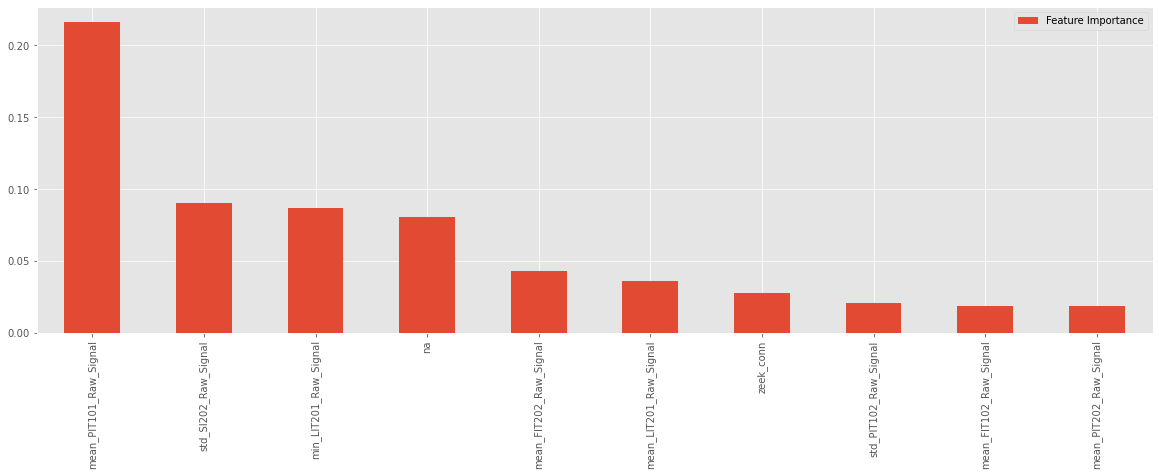

In [96]:
#plot feature importance of xgb
importance_df=pd.DataFrame(xgb_cv3.best_estimator_.feature_importances_, 
                           index=X_train.columns, columns=["Feature Importance"])

importance_df.sort_values(by="Feature Importance", ascending=False).head(10).plot(kind="bar",figsize=(20,6));

In [101]:
#print classification report
from sklearn.metrics import classification_report, plot_confusion_matrix
print('Classification report')
print(classification_report(y_test, y_hat3,target_names=["cyber","mechanical","normal"]))
print('\n')

Classification report
              precision    recall  f1-score   support

       cyber       1.00      0.30      0.47        46
  mechanical       0.77      0.82      0.79       413
      normal       0.92      0.92      0.92      1091

    accuracy                           0.87      1550
   macro avg       0.89      0.68      0.73      1550
weighted avg       0.88      0.87      0.87      1550





In [45]:
data_test.event.value_counts()

normal                    1091
HV_201                     234
LCV_103                     44
SV_201                      42
SV_101                      38
LCV_203                     33
dos                         30
injection                   16
power                       10
overall_instrument_air       6
Pumps                        6
Name: event, dtype: int64

In [46]:
data_test.EncodedErrors.value_counts()

2    1091
1     413
0      46
Name: EncodedErrors, dtype: int64

Also, we test the results of the binary classification:

In [116]:
labelencoder2=LabelEncoder()
labelencoder2.fit(data.binary)
data_train["EncodedErrors"]=labelencoder2.transform(data_train.binary)
data_test["EncodedErrors"]=labelencoder2.transform(data_test.binary)

In [117]:
features_train=data_train
features_train=features_train.drop(["event","binary","ternary","Unnamed: 0","EncodedErrors","na_FIT102_Raw_Signal","na_FIT202_Raw_Signal","na_LIT101_Raw_Signal","na_LIT201_Raw_Signal","na_PIT101_Raw_Signal","na_PIT102_Raw_Signal","na_PIT201_Raw_Signal","na_PIT202_Raw_Signal","na_SI102_Raw_Signal","na_SI202_Raw_Signal"],axis=1)
y_train=data_train["EncodedErrors"]
features_test=data_test
features_test=features_test.drop(["event","binary","ternary","Unnamed: 0","EncodedErrors","na_FIT102_Raw_Signal","na_FIT202_Raw_Signal","na_LIT101_Raw_Signal","na_LIT201_Raw_Signal","na_PIT101_Raw_Signal","na_PIT102_Raw_Signal","na_PIT201_Raw_Signal","na_PIT202_Raw_Signal","na_SI102_Raw_Signal","na_SI202_Raw_Signal"],axis=1)
y_test=data_test["EncodedErrors"]

In [118]:
X_train=features_train
X_test=features_test

In [119]:
attributes=["max_FIT102_Raw_Signal","min_FIT102_Raw_Signal","mean_FIT102_Raw_Signal","std_FIT102_Raw_Signal","max_FIT202_Raw_Signal","min_FIT202_Raw_Signal","mean_FIT202_Raw_Signal","std_FIT202_Raw_Signal","max_LIT101_Raw_Signal","min_LIT101_Raw_Signal","mean_LIT101_Raw_Signal","std_LIT101_Raw_Signal","max_LIT201_Raw_Signal","min_LIT201_Raw_Signal","mean_LIT201_Raw_Signal","std_LIT201_Raw_Signal","max_PIT101_Raw_Signal","min_PIT101_Raw_Signal","mean_PIT101_Raw_Signal","std_PIT101_Raw_Signal","max_PIT102_Raw_Signal","min_PIT102_Raw_Signal","mean_PIT102_Raw_Signal","std_PIT102_Raw_Signal","max_PIT201_Raw_Signal","min_PIT201_Raw_Signal","mean_PIT201_Raw_Signal","std_PIT201_Raw_Signal","max_PIT202_Raw_Signal","min_PIT202_Raw_Signal","mean_PIT202_Raw_Signal","std_PIT202_Raw_Signal","max_SI102_Raw_Signal","min_SI102_Raw_Signal","mean_SI102_Raw_Signal","std_SI102_Raw_Signal","max_SI202_Raw_Signal","min_SI202_Raw_Signal","mean_SI202_Raw_Signal","std_SI202_Raw_Signal","zeek_conn","na"]
scaler=StandardScaler()
scaler.fit(X_train[attributes])
X_train[attributes]=scaler.transform(X_train[attributes])
X_test[attributes]=scaler.transform(X_test[attributes])

In [120]:
xgb4=XGBClassifier(objective="binary:logistic",use_label_encoder=False)
parameters={"n_estimators":[125], "learning_rate":[0.2], "max_depth":[6], "gamma":[0.15]}

xgb_cv4=GridSearchCV(xgb4, parameters, scoring="accuracy",cv=5)
xgb_cv4.fit(X_train,y_train)

print("Best parameters:", xgb_cv4.best_params_ , ", Best CV Accuracy:", xgb_cv4.best_score_)

Best parameters: {'gamma': 0.15, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 125} , Best CV Accuracy: 0.8264555561681093


In [121]:
#prediction
y_hat4=xgb_cv4.best_estimator_.predict(X_test)
print("XGBC has test accuracy", round(100*(accuracy_score(y_hat4,y_test)),2), "%")

XGBC has test accuracy 88.52 %


In [122]:
y_baseline=np.zeros(len(y_test))
print("F1 score of baseline is", f1_score(y_test,y_baseline,average="macro"))
print("F1 score of XGB is", f1_score(y_test,y_hat4,average="macro"))

F1 score of baseline is 0.22847187655550025
F1 score of XGB is 0.8627789183855361


In [124]:
#print classification report
from sklearn.metrics import classification_report, plot_confusion_matrix
print('Classification report')
print(classification_report(y_test, y_hat4,target_names=["abnormal","normal"]))
print('\n')

Classification report
              precision    recall  f1-score   support

    abnormal       0.80      0.81      0.81       459
      normal       0.92      0.92      0.92      1091

    accuracy                           0.89      1550
   macro avg       0.86      0.86      0.86      1550
weighted avg       0.89      0.89      0.89      1550



